In [1]:
import os
from time import time
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

params = {
          'axes.titlesize': 15,   # Размер шрифта главной подписи
          'axes.labelsize': 14,   # Размер шрифта подписей осей
          'xtick.labelsize': 12,  # Размер шрифта подписей тикетов оси X
          'ytick.labelsize': 12,  # Размер шрифта подписей тикетов оси Y

          }

plt.rcParams.update(params)

__import__('warnings').filterwarnings("ignore")

In [2]:
df = pd.DataFrame()

path_file = r'D:\python-txt\DA-104_full\проект_стажировкa'
name_file = 'result roles (16.06.2022).xlsx'
file_xls = os.path.join(path_file, name_file)
file_pkl = os.path.join(path_file, 'dataset.pkl')
file_pickle = os.path.join(path_file, 'dataset_prepared.pkl')
read_msg = lambda s: print(f'Читаю файл: {s}')

In [3]:
start_time = time()
if os.access(file_pkl, os.F_OK):
    read_msg(file_pkl)
    df = pd.read_pickle(file_pkl)
else:
    read_msg(file_xls)
    df = pd.read_excel(file_xls)
print(f'Время выполнения: {time() - start_time} сек\n')

Читаю файл: D:\python-txt\DA-104_full\проект_стажировкa\dataset.pkl
Время выполнения: 0.944054126739502 сек



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76382 entries, 0 to 76381
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   premium                   76382 non-null  bool  
 1   name                      76382 non-null  object
 2   has_test                  76380 non-null  object
 3   response_letter_required  76382 non-null  object
 4   area                      76381 non-null  object
 5   salary                    40874 non-null  object
 6   type                      76379 non-null  object
 7   published_at              76380 non-null  object
 8   created_at                76381 non-null  object
 9   archived                  76380 non-null  object
 10  employer                  76382 non-null  object
 11  snippet                   76381 non-null  object
 12  schedule                  76381 non-null  object
 13  working_days              76381 non-null  object
 14  working_time_intervals

### В датасете 76382 объектов.

In [5]:
# посмотрим сколько пропусков
df.isna().sum()

premium                         0
name                            0
has_test                        2
response_letter_required        0
area                            1
salary                      35508
type                            3
published_at                    2
created_at                      1
archived                        2
employer                        0
snippet                         1
schedule                        1
working_days                    1
working_time_intervals          0
working_time_modes              0
accept_temporary                1
description                     0
experience                      0
key_skills                      1
specializations                 0
region                          0
dtype: int64

In [6]:
df.head()

,premium,name,has_test,response_letter_required,area,salary,type,published_at,created_at,archived,employer,snippet,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region
0,False,Младший специалист ручного тестирования,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",2022-03-28T09:08:00+0300,2022-03-28T09:08:00+0300,False,"{'id': '1740', 'name': 'Яндекс', 'url': 'https...",{'requirement': 'Внимательны и наблюдательны. ...,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.172', 'name': 'Начальный уровень, М...",Астраханская область
1,False,Пентестер,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",2022-04-01T08:52:06+0300,2022-04-01T08:52:06+0300,False,"{'id': '719820', 'name': 'SearchInform', 'url'...",{'requirement': 'Глубокие знания клиентских и ...,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,<p>Лидер на рынке систем информационной безопа...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область
2,False,Асессор-тестировщик,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",2022-03-29T15:20:02+0300,2022-03-29T15:20:02+0300,False,"{'id': '1740', 'name': 'Яндекс', 'url': 'https...",{'requirement': 'Консультирование коллег по уж...,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область
3,False,Тестировщик (асессор),False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",2022-03-29T15:37:33+0300,2022-03-29T15:37:33+0300,False,"{'id': '1740', 'name': 'Яндекс', 'url': 'https...",{'requirement': 'Готовы работать не меньше 20 ...,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область
4,False,Тестировщик.Net,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",2022-04-07T12:35:39+0300,2022-04-07T12:35:39+0300,False,"{'id': '1245158', 'name': 'МФК Саммит', 'url':...",{'requirement': 'Мы ищем талантливого и амбици...,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,<p><em><strong>Мы ищем талантливого и амбициоз...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область


Чтение данных из экселя занимает слишком много времени. В датафрейме содержится много колонок с именами Unnamed% уберем эти колонки и колонки с малым количеством данных и неинформативные колонки со ссылками.

In [7]:
drop_cols = [col for col in df.columns if col.startswith('Unnamed')]
drop_cols.extend(['id', 'department', 'url', 'alternate_url', 'relations', 'insider_interview'])
drop_cols = [col for col in drop_cols if col in df.columns]
df.drop(drop_cols, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76382 entries, 0 to 76381
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   premium                   76382 non-null  bool  
 1   name                      76382 non-null  object
 2   has_test                  76380 non-null  object
 3   response_letter_required  76382 non-null  object
 4   area                      76381 non-null  object
 5   salary                    40874 non-null  object
 6   type                      76379 non-null  object
 7   published_at              76380 non-null  object
 8   created_at                76381 non-null  object
 9   archived                  76380 non-null  object
 10  employer                  76382 non-null  object
 11  snippet                   76381 non-null  object
 12  schedule                  76381 non-null  object
 13  working_days              76381 non-null  object
 14  working_time_intervals

Теперь другое дело. И сохраним датафрейм в формате pickle для ускорение чтения и записи данных

In [8]:
if not os.access(file_pkl, os.F_OK):
    df.to_pickle(file_pkl)

In [9]:
start_time = time()
df = pd.read_pickle(file_pkl)
print(f'Время выполнения: {time() - start_time} сек\n')

Время выполнения: 0.8660495281219482 сек



Время чтения данных уменьшилось в десятки раз!!!

Продолжим исследование датасета

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76382 entries, 0 to 76381
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   premium                   76382 non-null  bool  
 1   name                      76382 non-null  object
 2   has_test                  76380 non-null  object
 3   response_letter_required  76382 non-null  object
 4   area                      76381 non-null  object
 5   salary                    40874 non-null  object
 6   type                      76379 non-null  object
 7   published_at              76380 non-null  object
 8   created_at                76381 non-null  object
 9   archived                  76380 non-null  object
 10  employer                  76382 non-null  object
 11  snippet                   76381 non-null  object
 12  schedule                  76381 non-null  object
 13  working_days              76381 non-null  object
 14  working_time_intervals

In [11]:
df.head(7)

,premium,name,has_test,response_letter_required,area,salary,type,published_at,created_at,archived,employer,snippet,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region
0,False,Младший специалист ручного тестирования,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",2022-03-28T09:08:00+0300,2022-03-28T09:08:00+0300,False,"{'id': '1740', 'name': 'Яндекс', 'url': 'https...",{'requirement': 'Внимательны и наблюдательны. ...,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.172', 'name': 'Начальный уровень, М...",Астраханская область
1,False,Пентестер,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",2022-04-01T08:52:06+0300,2022-04-01T08:52:06+0300,False,"{'id': '719820', 'name': 'SearchInform', 'url'...",{'requirement': 'Глубокие знания клиентских и ...,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,<p>Лидер на рынке систем информационной безопа...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область
2,False,Асессор-тестировщик,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",2022-03-29T15:20:02+0300,2022-03-29T15:20:02+0300,False,"{'id': '1740', 'name': 'Яндекс', 'url': 'https...",{'requirement': 'Консультирование коллег по уж...,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область
3,False,Тестировщик (асессор),False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",2022-03-29T15:37:33+0300,2022-03-29T15:37:33+0300,False,"{'id': '1740', 'name': 'Яндекс', 'url': 'https...",{'requirement': 'Готовы работать не меньше 20 ...,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область
4,False,Тестировщик.Net,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",2022-04-07T12:35:39+0300,2022-04-07T12:35:39+0300,False,"{'id': '1245158', 'name': 'МФК Саммит', 'url':...",{'requirement': 'Мы ищем талантливого и амбици...,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,<p><em><strong>Мы ищем талантливого и амбициоз...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область
5,False,SMM-копирайтер,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 45000, 'to': 45000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",2022-03-23T08:48:35+0300,2022-03-23T08:48:35+0300,False,"{'id': '3106959', 'name': 'Комплекс-А', 'url':...",{'requirement': 'Основы и принципы PR-менеджме...,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,<p>ООО &quot;Комплекс-А&quot; предоставляет ус...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'Медиапланирование'}, {'name': 'Инте...","[{'id': '3.236', 'name': 'Производство рекламы...",Астраханская область
6,False,Исполнительный директор (IT-сфера),False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",2022-04-01T15:59:43+0300,2022-04-01T15:59:43+0300,False,"{'id': '2076223', 'name': 'Адептик Плюс', 'url...",{'requirement': 'Релевантный опыт работы от дв...,"{'id': 'fullDay', 'name': 'Полный день'}",

In [12]:
def is_null(item):
    if pd.isna(item):
        return True
    item = item.strip()
    if not item or item in ('[]',):
        return True
    return False


def marking_nan(item):
    if is_null(item):
        return np.NaN
    return item

In [13]:
# если значение ячейки пустое --> запишем в неё NaN
for name_col in df.columns:
    if pd.api.types.is_string_dtype(df[name_col]):
        df[name_col] = df[name_col].map(marking_nan)

# посмотрим сколько пропусков
df.isna().sum()        

premium                         0
name                            0
has_test                        2
response_letter_required        0
area                            1
salary                      35508
type                            3
published_at                    2
created_at                      1
archived                        2
employer                        2
snippet                         1
schedule                        1
working_days                75972
working_time_intervals      74555
working_time_modes          75175
accept_temporary                5
description                     2
experience                      2
key_skills                  12696
specializations                 4
region                          6
dtype: int64

Видим, что колонки 'working_days', 'working_time_intervals', 'working_time_modes' - были заполнены пропусками.

#### Поработаем с колонкой *name*

In [14]:
# переведем в нижний регистр
df['name'] = df['name'].str.lower()
df['name'] = df['name'].str.replace('1c', '1с')
df['name'] = df['name'].str.replace('тестировщик (асессор)', 'асессор-тестировщик')
# выделим ту часть, что в скобках
df['name_parts'] = df['name'].str.split('(')
df['name_part1'] = df['name_parts'].apply(lambda x: x[0].strip())
df['name_part2'] = df['name_parts'].apply(lambda x: x[1].strip(')') if len(x) > 1 else np.NaN)
df.drop('name_parts', axis=1, inplace=True)

Посмотрим на вторую часть колонки "name"

In [15]:
show_cols = ['name', 'name_part1', 'name_part2']
df[~(df['name_part2'].isna())][show_cols]

,name,name_part1,name_part2
3,тестировщик (асессор),тестировщик,асессор
6,исполнительный директор (it-сфера),исполнительный директор,it-сфера
12,менеджер по поиску коммерческой недвижимости (...,менеджер по поиску коммерческой недвижимости,астраханская область
28,"аналитик сопровождения 1с (бгу, зкгу, зкбу)",аналитик сопровождения 1с,"бгу, зкгу, зкбу"
33,руководитель отдела качества (тула),руководитель отдела качества,тула
...,...,...,...
76361,рекрутер (удаленная работа),рекрутер,удаленная работа
76362,hr-менеджер (удаленно),hr-менеджер,удаленно
76366,менеджер по подбору персонала (рекрутер),менеджер по подбору персонала,рекрутер
76370,специалист по подбору персонала (рекрутер),специалист по подбору персонала,рекрутер


Видно, что в скобках записывали в основном комментарии

In [16]:
df['name_part2'].value_counts()

удаленно                                                     869
middle                                                       345
remote                                                       161
junior                                                       132
стажер                                                       122
                                                            ... 
ispring                                                        1
окей алтуфьево трц весна                                       1
по работе с начинающими программистами / студентами вузов      1
г. егорьевск                                                   1
three.js                                                       1
Name: name_part2, Length: 7761, dtype: int64

In [17]:
# преобразование строки в словарь или список словарей

from ast import literal_eval


STAPLES = {'{': '}', '[': ']'}


def get_item_from_dict(cell_text, key_name='name'):
    value = np.NaN
    if not pd.isna(cell_text):
        cell_text = cell_text.strip()
        ch_fst = cell_text[0]
        ch_lst = cell_text[-1]
        # открывающая и закрывающая скобки должны быть и быть одинаковыми
        if ch_fst in STAPLES.keys() and ch_lst == STAPLES[ch_fst]:
            result = literal_eval(cell_text)
            if isinstance(result, dict):
                value = result.get(key_name, np.NaN)
            elif isinstance(result, list):
                values = []
                for item in result:
                    value = item.get(key_name, np.NaN)
                    if not pd.isna(value):
                        values.append(value)
                if values:
                    return sorted(values)
    return value


def make_str_lower(item):
    if isinstance(item, list):
        return tuple([s.lower() for s in item])
    return item

In [18]:
# salary поделить на 2 части мин и мах оклад,
# учесть при gross = True это без вычета налогов,
# т.е если False --> умножить на 1.13

def get_salary(cell_text):
    value_from = get_item_from_dict(cell_text, 'from')
    value_to = get_item_from_dict(cell_text, 'to')
#     if pd.isna(value_from) or not value_from:
#         value_from = value_to
#     if pd.isna(value_to) or not value_to:
#         value_to = value_from
    gross = get_item_from_dict(cell_text, 'gross')
    # если это чистый доход, т.е. с учетом налогов --> умножим на 13%
    if not gross:
        if value_from:
            value_from = round(value_from * 1.13)
        if value_to:
            value_to = round(value_to * 1.13)
    return value_from, value_to


df['salary_min'] = df['salary'].map(get_salary)
df['salary_max'] = df['salary_min'].apply(lambda x: x[1])
df['salary_min'] = df['salary_min'].apply(lambda x: x[0])

In [19]:
# посмотрим на пропуски в датах
df[(df.published_at.isna()) | (df.created_at.isna())]

,premium,name,has_test,response_letter_required,area,salary,type,published_at,created_at,archived,employer,snippet,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region,name_part1,name_part2,salary_min,salary_max
39660,False,художник-гравер г. ярославль ( подработка,NaN,False,False,"{'id': '112', 'name': 'Ярославль', 'url': 'htt...",NaN,NaN,2022-04-05T13:29:58+0300,2022-04-05T13:29:58+0300,NaN,"{'id': '847624', 'name': 'Данила-Мастер', 'url...","{'name': 'Соловьева Ирина', 'email': 'irina.so...","{'id': 'flexible', 'name': 'Гибкий график'}",NaN,NaN,NaN,False,<p>«Данила-мастер» - камнеобрабатывающая компа...,"{'id': 'between1And3', 'name': 'От 1 года до 3...",NaN,"[{'id': '1.475', 'name': 'Игровое ПО', 'profar...",художник-гравер г. ярославль,подработка,NaN,NaN
41912,False,менеджер по недвижимости(жк столичный,ЖК Привилегия,ЖК Паруса,NaN,False,False,"{'city': 'Казань', 'street': 'Спартаковская ул...",NaN,NaN,https://api.hh.ru/vacancies/35034669?host=hh.ru,https://hh.ru/vacancy/35034669,"{'id': '228268', 'name': 'Флэт', 'url': 'https...",{'requirement': 'Высокая степень обучаемости. ...,"{'name': 'Хусаинова Аделя', 'email': 'adelya.h...","{'id': 'fullDay', 'name': 'Полный день'}",NaN,NaN,NaN,False,<p>В агентстве недвижимости «ФЛЭТ» открыты вак...,"{'id': 'noExperience', 'name': 'Нет опыта'}",менеджер по недвижимости,жк столичный,NaN,NaN
56043,False,senior 3d animator (gamedev,NaN,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",NaN,NaN,2022-03-30T13:31:57+0300,2022-03-30T13:31:57+0300,NaN,"{'id': '2061860', 'name': 'Panoramik', 'url': ...",NaN,"{'id': 'fullDay', 'name': 'Полный день'}",NaN,NaN,NaN,False,"<p>Привет, мы — <strong>Panoramik!</strong><br...","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Autodesk Maya'}, {'name': 'Advanced...","[{'id': '1.475', 'name': 'Игровое ПО', 'profar...",senior 3d animator,gamedev,NaN,NaN


In [20]:
# published_at, created_at преобразовать в datetime # 2022-03-29T15:37:33+0300
# заполним пропуски в published_at данными из created_at
df.published_at = df.apply(lambda row: row.created_at if pd.isna(row.published_at) else row.published_at, axis=1)
for col in ('published_at', 'created_at'):
    df.dropna(subset=[col], inplace=True)
    # выделим строку с датой
    df[col] = df[col].str.findall( r'\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}')
    df[col] = df[col].apply(lambda s: s[0] if s else np.NaN)
    df.dropna(subset=[col], inplace=True)
    # преобразуем в формат datetime
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%dT%H:%M:%S')

### Преобразуем значения в остальных колонках из словарей в читаемые поля

In [21]:
convert_columns = ('area', 'type', 'employer', 'schedule', 'experience', 'key_skills', 'specializations')
for name_col in convert_columns:
    print(f'Обрабатываю колонку {name_col}')
    df[f'{name_col}_name'] = df[name_col].map(get_item_from_dict)
    if name_col in ('key_skills', 'specializations'):
        df[f'{name_col}_name'] = df[f'{name_col}_name'].map(make_str_lower)

Обрабатываю колонку area
Обрабатываю колонку type
Обрабатываю колонку employer
Обрабатываю колонку schedule
Обрабатываю колонку experience
Обрабатываю колонку key_skills
Обрабатываю колонку specializations


name_col = 'snippet'
names = ('requirement', 'responsibility')
for name_key in names:
    df[f'{name_key}_name'] = df[name_col].apply(lambda x: get_item_from_dict(x, name_key))

In [22]:
df.head(7)

,premium,name,has_test,response_letter_required,area,salary,type,published_at,created_at,archived,employer,snippet,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region,name_part1,name_part2,salary_min,salary_max,area_name,type_name,employer_name,schedule_name,experience_name,key_skills_name,specializations_name
0,False,младший специалист ручного тестирования,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",2022-03-28 09:08:00,2022-03-28 09:08:00,False,"{'id': '1740', 'name': 'Яндекс', 'url': 'https...",{'requirement': 'Внимательны и наблюдательны. ...,"{'id': 'remote', 'name': 'Удаленная работа'}",NaN,NaN,NaN,False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",NaN,"[{'id': '1.172', 'name': 'Начальный уровень, М...",Астраханская область,младший специалист ручного тестирования,NaN,NaN,NaN,Астрахань,Открытая,Яндекс,Удаленная работа,Нет опыта,NaN,"(информационные технологии, интернет, мультиме..."
1,False,пентестер,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",2022-04-01 08:52:06,2022-04-01 08:52:06,False,"{'id': '719820', 'name': 'SearchInform', 'url'...",{'requirement': 'Глубокие знания клиентских и ...,"{'id': 'fullDay', 'name': 'Полный день'}",NaN,NaN,NaN,False,<p>Лидер на рынке систем информационной безопа...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,пентестер,NaN,NaN,NaN,Астрахань,Открытая,SearchInform,Полный день,От 3 до 6 лет,"(linux, sql, базы данных, информационная безоп...","(инженер, программирование, разработка, тестир..."
2,False,асессор-тестировщик,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",2022-03-29 15:20:02,2022-03-29 15:20:02,False,"{'id': '1740', 'name': 'Яндекс', 'url': 'https...",{'requirement': 'Консультирование коллег по уж...,"{'id': 'remote', 'name': 'Удаленная работа'}",NaN,NaN,NaN,False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",NaN,"[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,асессор-тестировщик,NaN,NaN,NaN,Астрахань,Открытая,Яндекс,Удаленная работа,Нет опыта,NaN,"(инженер, программирование, разработка, тестир..."
3,False,тестировщик (асессор),False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",2022-03-29 15:37:33,2022-03-29 15:37:33,False,"{'id': '1740', 'name': 'Яндекс', 'url': 'https...",{'requirement': 'Готовы работать не меньше 20 ...,"{'id': 'remote', 'name': 'Удаленная работа'}",NaN,NaN,NaN,False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",NaN,"[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,тестировщик,асессор,NaN,NaN,Астрахань,Открытая,Яндекс,Удаленная работа,Нет опыта,NaN,"(инженер, программирование, разработка, тестир..."
4,False,тестировщик.net,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",2022-04-07 12:35:39,2022-04-07 12:35:39,False,"{'id': '1245158', 'name': 'МФК Саммит', 'url':...",{'requirement': 'Мы ищем талантливого и амбици...,"{'id': 'fullDay', 'name': 'Полный день'}",NaN,NaN,NaN,False,<p><em><strong>Мы ищем талантливого и амбициоз...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,тестировщик.net,NaN,25000.0,50000.0,Астрахань,Открытая,МФК Саммит,Полный день,От 1 года до 3 лет,"(api, c#, git, sql, тестирование)","(инженер, программирование, разработка, тестир..."
5,False,smm-копирайтер,False,False,"{'id': '1

### Уберем из анализа неинформативные колонки и проведем неграфический анализ данных:  посмотрим на частоту встречаемости значений ТОП-10 в списке

In [23]:
df['name_part1'].value_counts()[:20]

системный администратор             2147
программист 1с                      1871
системный аналитик                   837
менеджер по персоналу                832
специалист технической поддержки     655
менеджер по подбору персонала        638
специалист по кадрам                 612
агент по недвижимости                536
аналитик                             534
инженер-программист                  477
бизнес-аналитик                      454
инженер технической поддержки        447
менеджер по продаже недвижимости     413
smm-менеджер                         402
специалист по подбору персонала      369
frontend-разработчик                 356
графический дизайнер                 339
qa engineer                          337
руководитель проектов                309
руководитель проекта                 305
Name: name_part1, dtype: int64

In [24]:
show_columns = [col for idx, col in enumerate(df.columns) if idx < 4 or col.endswith('name')  or '_part' in col]
for name_col in show_columns:
    print(f'Признак: "{name_col}", количество уникальных значений {df[name_col].nunique()}')
    print(df[name_col].value_counts()[:10])
    print()

Признак: "premium", количество уникальных значений 2
False    76245
True       135
Name: premium, dtype: int64

Признак: "name", количество уникальных значений 33059
системный администратор             1891
программист 1с                      1639
менеджер по персоналу                699
системный аналитик                   566
менеджер по подбору персонала        549
специалист по кадрам                 548
специалист технической поддержки     498
агент по недвижимости                407
аналитик                             394
инженер-программист                  373
Name: name, dtype: int64

Признак: "has_test", количество уникальных значений 2
False    74688
True      1690
Name: has_test, dtype: int64

Признак: "response_letter_required", количество уникальных значений 2
False    75345
True      1035
Name: response_letter_required, dtype: int64

Признак: "name_part1", количество уникальных значений 24108
системный администратор             2147
программист 1с                      1

In [25]:
def values_to_df(col_name):
    return pd.DataFrame(pd.core.common.flatten(df[f'{col_name}_name'].dropna().tolist()), columns=[col_name])

# создадим ДФ из ключевых навыков
df_sk = values_to_df('key_skills')

# создадим ДФ из специализаций
df_sp = values_to_df('specializations')

In [26]:
# ТОП-10 навыков
df_sk.key_skills.value_counts()[:10]

работа в команде        8523
sql                     7328
грамотная речь          6979
linux                   5351
git                     5152
английский язык         4919
подбор персонала        4476
ведение переговоров     4417
управление проектами    3998
python                  3670
Name: key_skills, dtype: int64

In [27]:
# ТОП-10 специализаций
df_sp.specializations.value_counts()[:10]

инженер                                  35351
программирование, разработка             27301
системы управления предприятием (erp)    19667
поддержка, helpdesk                      16353
системный администратор                  16295
начальный уровень, мало опыта            15842
web инженер                              15519
web мастер                               15470
аналитик                                 13434
интернет                                 13111
Name: specializations, dtype: int64

### Признаки: premium, has_test, response_letter_required, type, archived почти целиком заполнены одним значением и не представляют дальнейшего интереса для анализа, уберем их

In [28]:
used_columns = ['name', 'name_part1', 'name_part2', 'salary_min', 'salary_max',
                            'published_at', 'created_at', 'employer_name',
                            'region', 'area_name', 'experience_name', 'key_skills_name',
                            'specializations_name']

df[used_columns].to_pickle(file_pickle)

In [29]:
start_time = time()
dfp = pd.read_pickle(file_pickle)
print(f'Время выполнения: {time() - start_time} сек\n')

Время выполнения: 0.5270302295684814 сек



In [30]:
dfp.head(7)

,name,name_part1,name_part2,salary_min,salary_max,published_at,created_at,employer_name,region,area_name,experience_name,key_skills_name,specializations_name
0,младший специалист ручного тестирования,младший специалист ручного тестирования,NaN,NaN,NaN,2022-03-28 09:08:00,2022-03-28 09:08:00,Яндекс,Астраханская область,Астрахань,Нет опыта,NaN,"(информационные технологии, интернет, мультиме..."
1,пентестер,пентестер,NaN,NaN,NaN,2022-04-01 08:52:06,2022-04-01 08:52:06,SearchInform,Астраханская область,Астрахань,От 3 до 6 лет,"(linux, sql, базы данных, информационная безоп...","(инженер, программирование, разработка, тестир..."
2,асессор-тестировщик,асессор-тестировщик,NaN,NaN,NaN,2022-03-29 15:20:02,2022-03-29 15:20:02,Яндекс,Астраханская область,Астрахань,Нет опыта,NaN,"(инженер, программирование, разработка, тестир..."
3,тестировщик (асессор),тестировщик,асессор,NaN,NaN,2022-03-29 15:37:33,2022-03-29 15:37:33,Яндекс,Астраханская область,Астрахань,Нет опыта,NaN,"(инженер, программирование, разработка, тестир..."
4,тестировщик.net,тестировщик.net,NaN,25000.0,50000.0,2022-04-07 12:35:39,2022-04-07 12:35:39,МФК Саммит,Астраханская область,Астрахань,От 1 года до 3 лет,"(api, c#, git, sql, тестирование)","(инженер, программирование, разработка, тестир..."
5,smm-копирайтер,smm-копирайтер,NaN,50850.0,50850.0,2022-03-23 08:48:35,2022-03-23 08:48:35,Комплекс-А,Астраханская область,Астрахань,От 3 до 6 лет,"(pr, анализ pr стратегии конкурентов, грамотна...","(pr, маркетинговые коммуникации, аналитик, инт..."
6,исполнительный директор (it-сфера),исполнительный директор,it-сфера,NaN,NaN,2022-04-01 15:59:43,2022-04-01 15:59:43,Адептик Плюс,Астраханская область,Астрахань,От 1 года до 3 лет,"(аналитическое мышление, бизнес-анализ, бизнес...","(информационные технологии, интернет, мультиме..."


In [31]:
dfp.describe().round()

,salary_min,salary_max
count,37175.0,21767.0
mean,84094.0,145569.0
std,70920.0,174278.0
min,1.0,1.0
25%,40000.0,56500.0
50%,62150.0,100000.0
75%,101700.0,169500.0
max,1000000.0,5650000.0


Видно, что в зарплатах есть выбросы, удалим всё, что выходит за пределы трех сигм

In [32]:
dfs = pd.DataFrame(columns=['Оклад, руб.', 'Зарплата'])
salaries = {'salary_min': 'Мин.', 'salary_max': 'Макс.'}
for salary in salaries:
    min_salary = dfp[salary].quantile(0.005)
    max_salary = dfp[salary].quantile(0.995)
    print(f'Признак: {salary}, нижний порог={min_salary}, '
          f'верхний порог={max_salary}')
    outlers_salary = (dfp[salary] < min_salary) | (dfp[salary] > max_salary)
    dfp.loc[outlers_salary, salary] = np.NaN
    tmp = dfp[[salary, 'name']]
    tmp.columns = dfs.columns
    tmp.loc[:, 'Зарплата'] = salaries[salary]
    dfs = pd.concat([dfs, tmp], axis=0, ignore_index=True)

Признак: salary_min, нижний порог=1699.35, верхний порог=450000.0
Признак: salary_max, нижний порог=2825.0, верхний порог=1130000.0


In [33]:
dfp.describe().round()

,salary_min,salary_max
count,36806.0,21598.0
mean,82137.0,140730.0
std,61992.0,133829.0
min,1700.0,2825.0
25%,40000.0,56500.0
50%,62150.0,100000.0
75%,101700.0,169500.0
max,450000.0,1130000.0


#### Медианная зарплата находится в диапазоне от 62.5 до 100 тысяч. Средняя зарплата почти в полтора раза выше 82-140 тысяч - это за счет наличия выбросов в большую сторону.

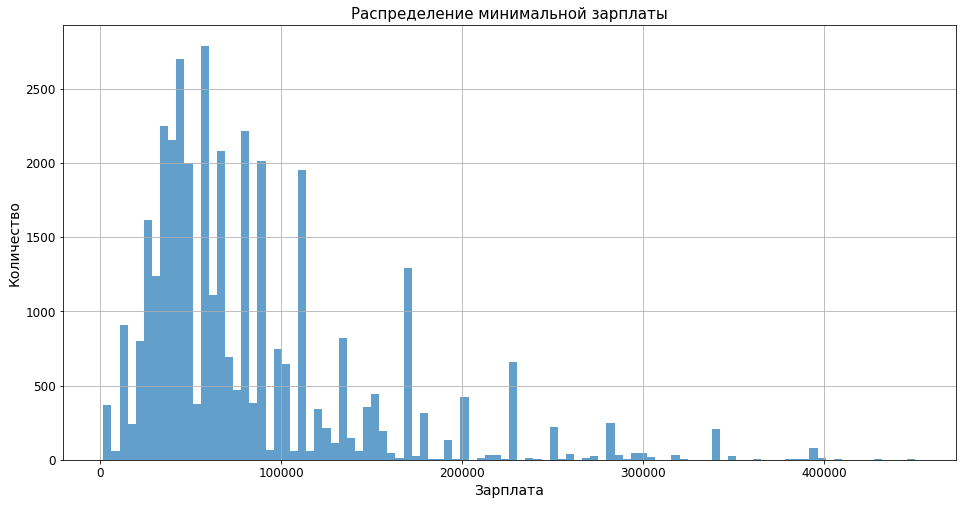

In [34]:
dfp['salary_min'].hist(bins=100, figsize=(16, 8), alpha=0.7)
plt.ylabel('Количество')
plt.xlabel('Зарплата')
plt.title('Распределение минимальной зарплаты')
plt.show()

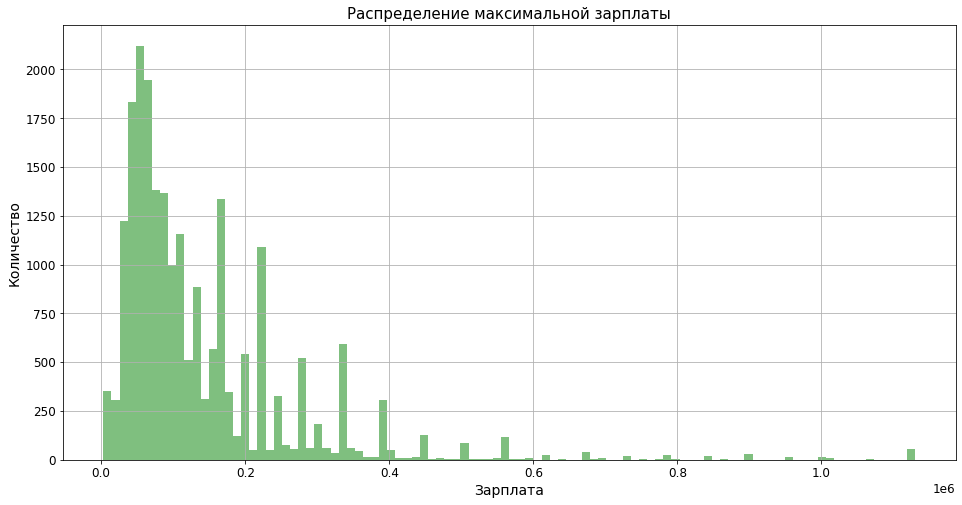

In [35]:
dfp['salary_max'].hist(bins=100, figsize = (16, 8), color='g', alpha=0.5)
plt.ylabel('Количество')
plt.xlabel('Зарплата')
plt.title('Распределение максимальной зарплаты')
plt.show()

#### Посмотрим на зарплаты по другому

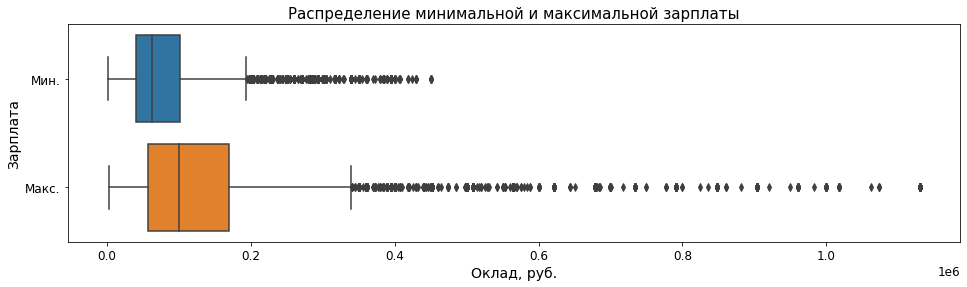

In [36]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.boxplot(x='Оклад, руб.', y='Зарплата', data=dfs, ax=ax)
plt.title('Распределение минимальной и максимальной зарплаты')
plt.show()

Посмотрим на другие числовые признаки: 'created_at', 'published_at'

In [37]:
dates = ('created_at', 'published_at')
for date in dates:
    print(f'Признак: {date}, минимальная дата={dfp[date].min().date()}, '
          f'максимальная дата={dfp[date].max().date()}')

Признак: created_at, минимальная дата=2022-03-14, максимальная дата=2022-04-14
Признак: published_at, минимальная дата=2022-03-14, максимальная дата=2022-04-14


В датасете присутствуют даты в период месяц. Посмотрим на распределение количества объявлений по дням месяца по признаку created_at.

In [38]:
dfp['created_day'] = dfp.created_at.dt.day
dfp['week_day'] = dfp.created_at.dt.weekday

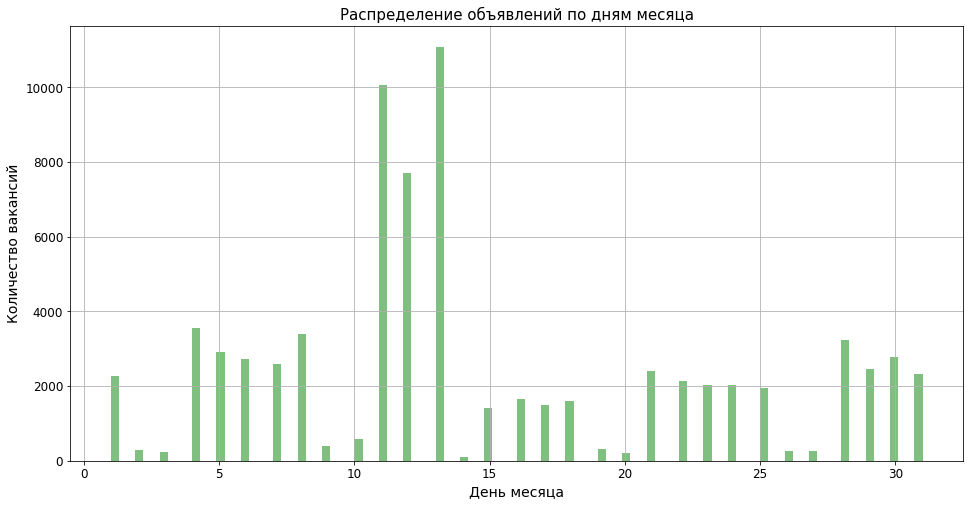

In [39]:
dfp['created_day'].hist(bins=100, figsize = (16, 8), color='g', alpha=0.5)
plt.ylabel('Количество вакансий')
plt.xlabel('День месяца')
plt.title('Распределение объявлений по дням месяца')
plt.show()

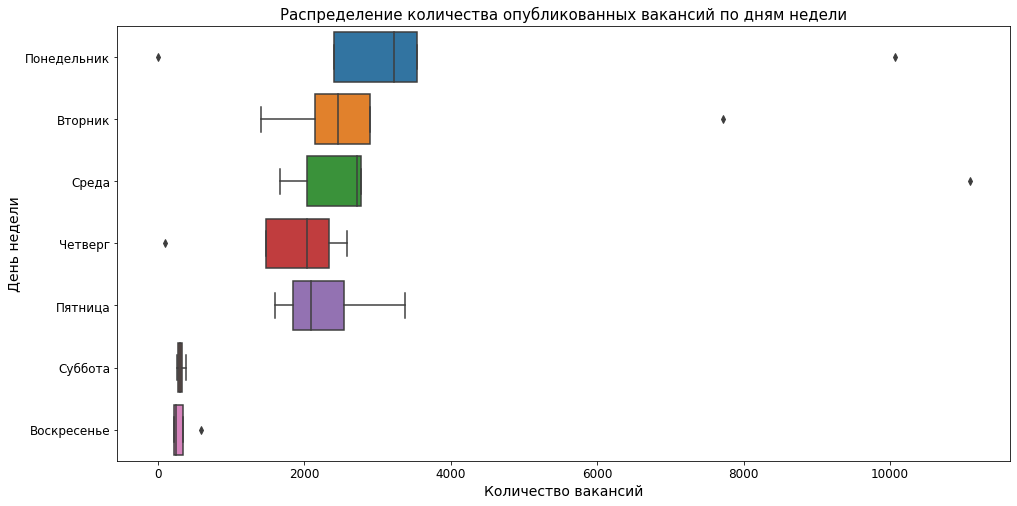

In [40]:
name_days = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
grp = dfp.groupby(['week_day', 'created_day'], as_index=False)['name'].count().rename(columns={'name': 'total'})
grp['week_day'] = grp['week_day'].map({i: d for i, d in enumerate(name_days)})

fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(y='week_day', x='total', data=grp, ax=ax)
plt.title('Распределение количества опубликованных вакансий по дням недели')
plt.xlabel('Количество вакансий')
plt.ylabel('День недели')
plt.show()

Из этого графика видно, что максимум размещения вакансий приходится на понедельник и плавно убывает и в пятницу небольшой всплеск размещения вакансий. Если этот график построить по средним значениям - то максимум пришлеся бы на среду из-за выброса и значения в понедельник и четверг были бы ниже реальности. Это видно на гистограмме ниже.

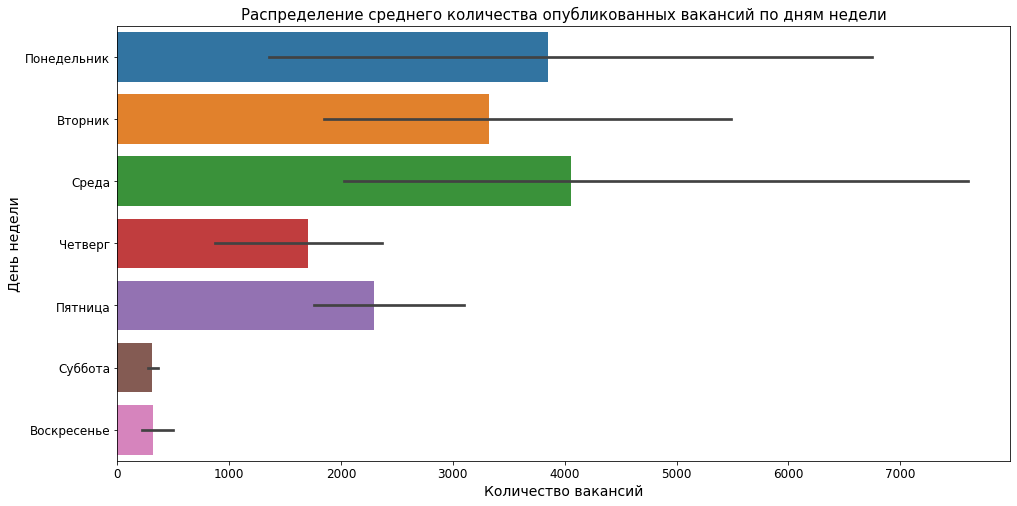

In [41]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(y='week_day', x='total', data=grp, ax=ax)
plt.title('Распределение среднего количества опубликованных вакансий по дням недели')
plt.xlabel('Количество вакансий')
plt.ylabel('День недели')
plt.show()

#### Неграфический анализ категориальных данных приведен выше, на этапе исследования колонок на предмет информативности. 
#### Для отобранных колонок проведем графический анализ ТОП-20 признаков


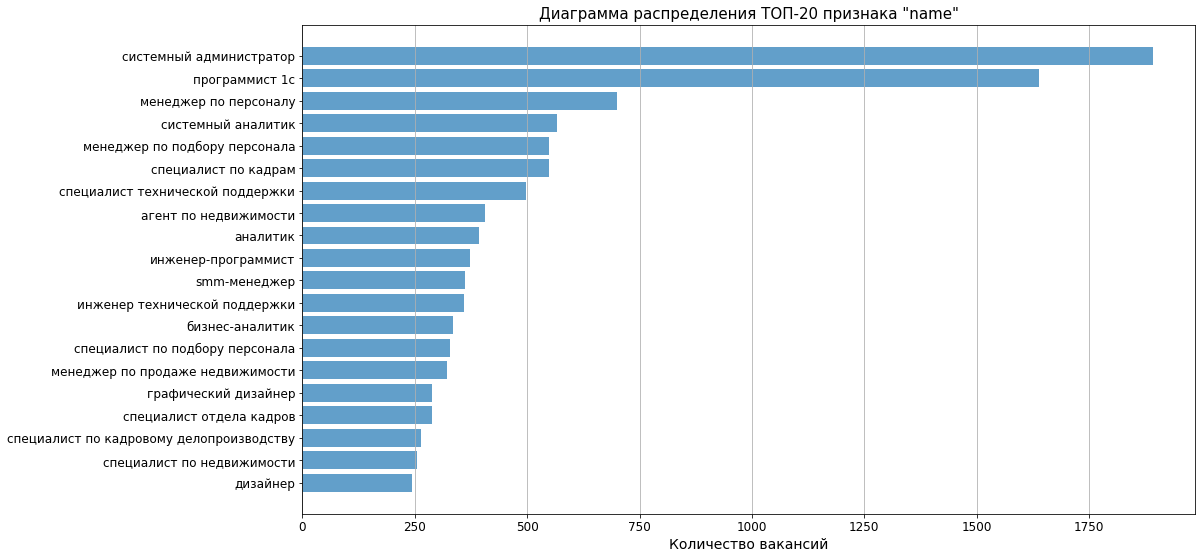

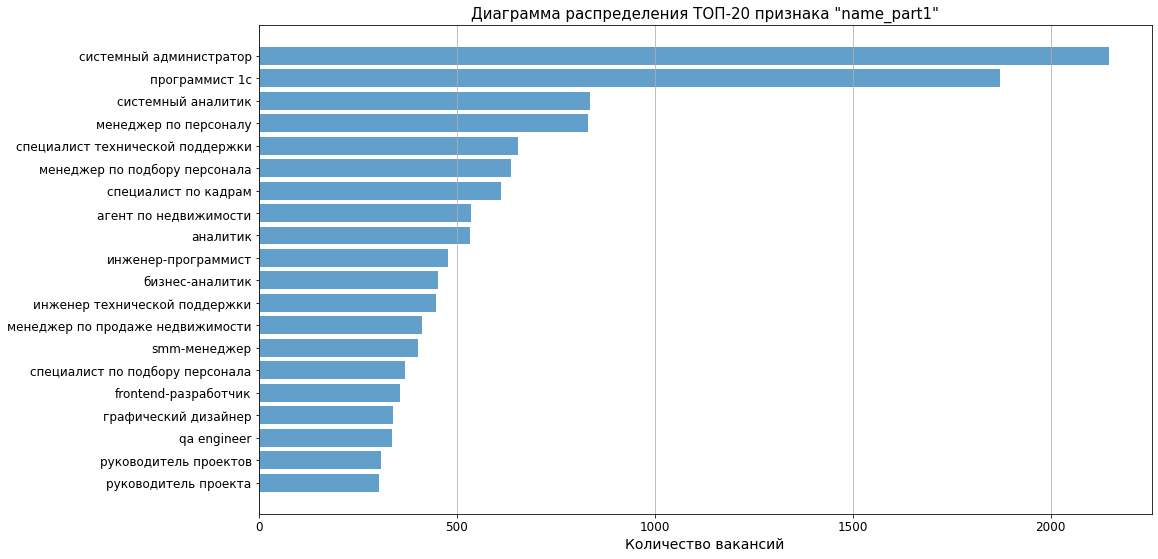

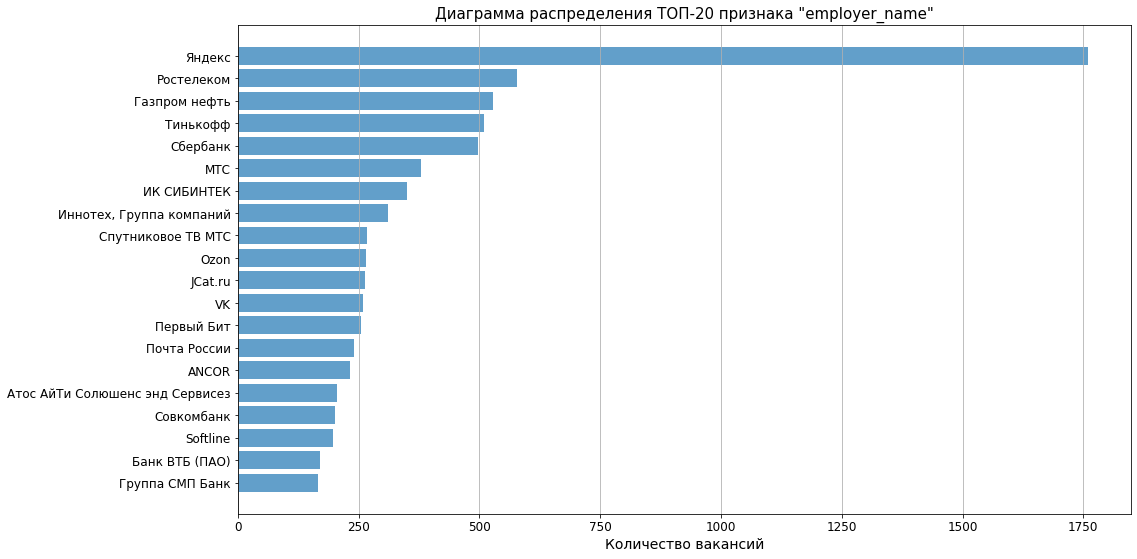

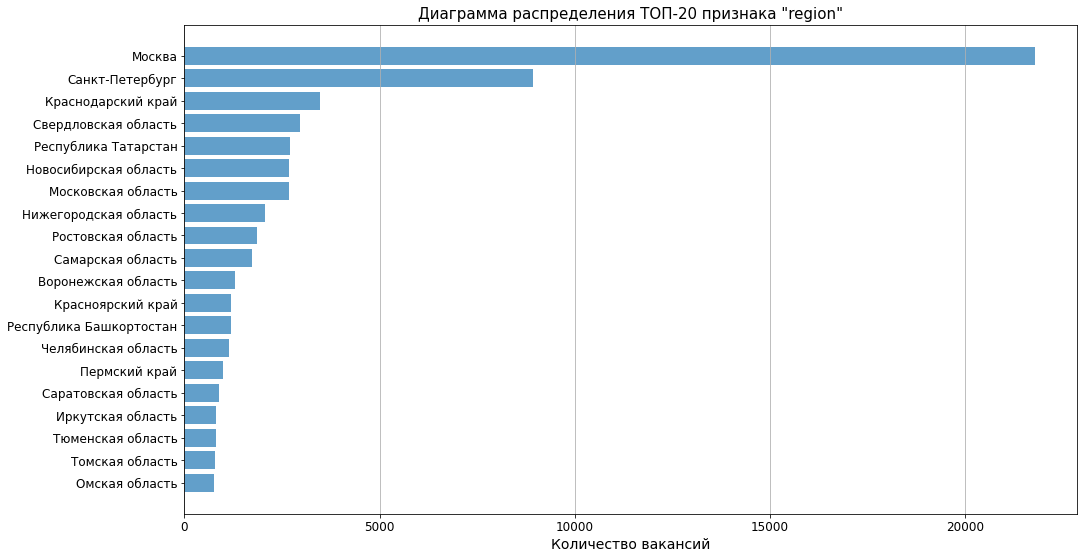

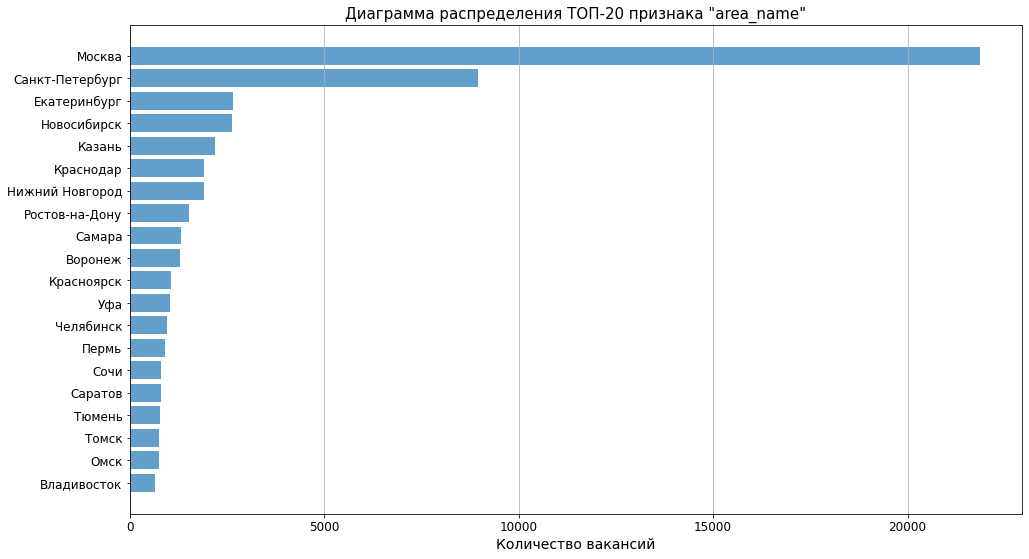

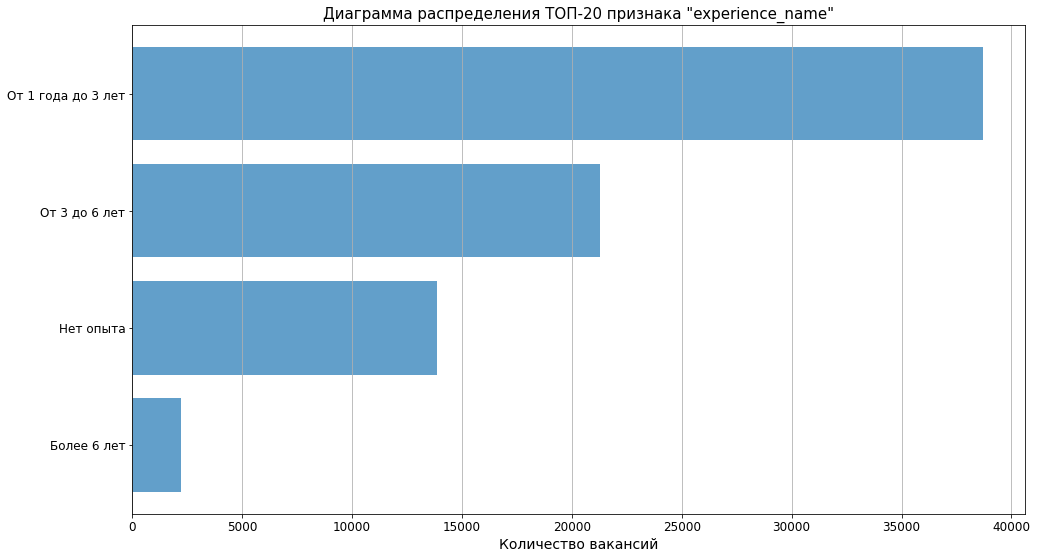

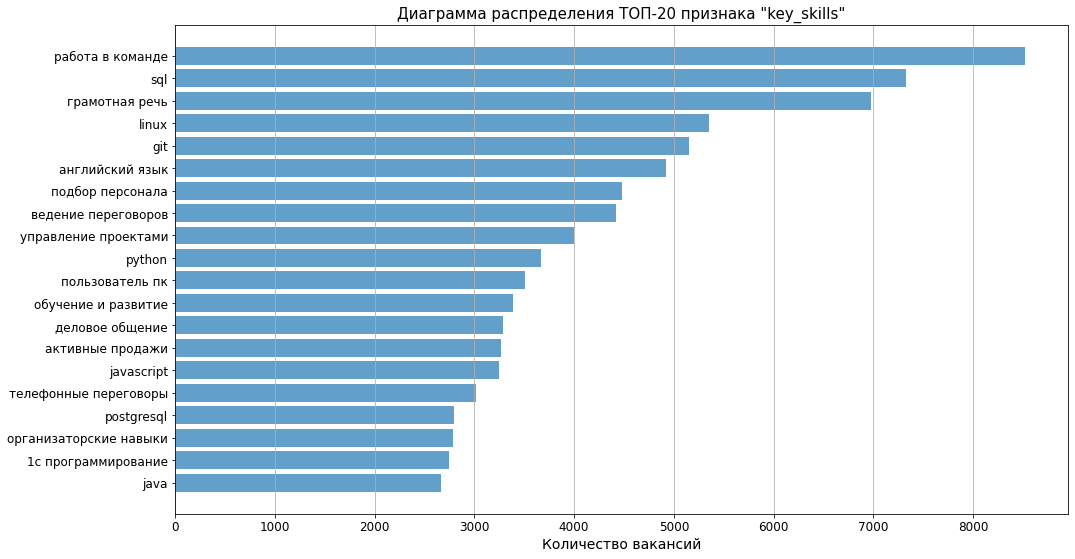

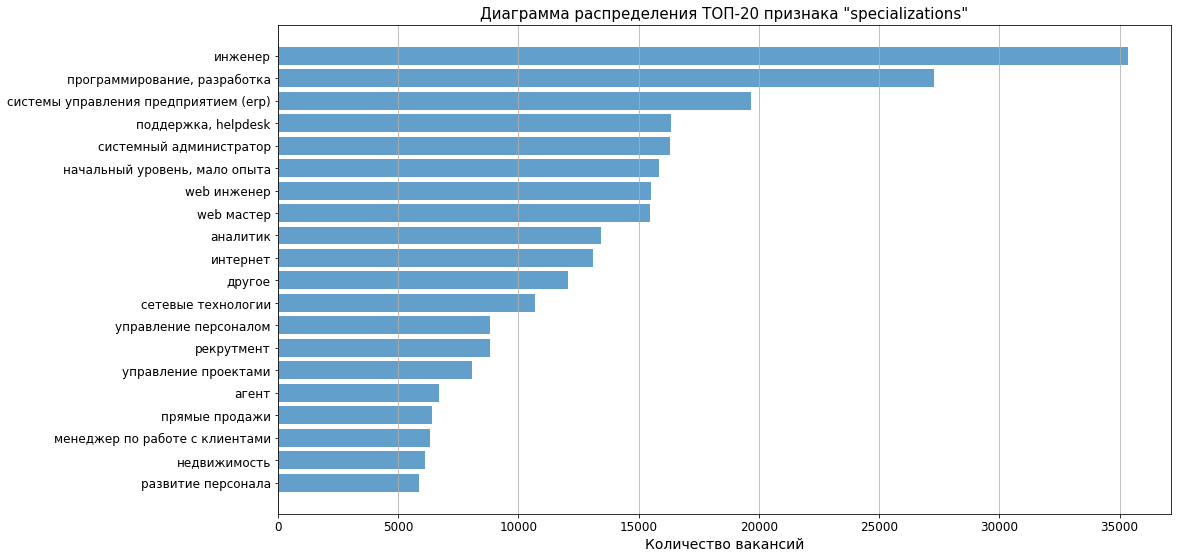

In [45]:
def show_barh(dataset, column_name):
    show_counts = dataset[column_name].value_counts()[:20][::-1]
    fig, ax = plt.subplots(figsize=(16, 9))
    plt.barh(show_counts.index, show_counts.values, alpha=0.7)
    plt.grid(axis='x')
    plt.title(f'Диаграмма распределения ТОП-20 признака "{name_col}"')
    plt.xlabel('Количество вакансий')
    plt.show()


graph_columns = ['name', 'name_part1', 'employer_name', 'region', 'area_name',
                 'experience_name', 'key_skills', 'specializations']
for name_col in graph_columns:
    if name_col == 'key_skills':
        show_barh(df_sk, name_col)
    elif name_col == 'specializations':
        show_barh(df_sp, name_col)
    else:
        show_barh(df, name_col)

Удаление из признака "name" второй части в скобках принесло пользу, количество вакансий увеличилось и некоторые изменили свой рейтинг. 
1. Наиболее востребованные профессии:
- системный администратор 
- программист 1с          
- системный аналитик      
- менеджер по персоналу   
2. Больше всего вакансий публикует Яндекс

3. Наиболее нуждаются в работниках Москва и Санкт-Петербург

4. Большинство работодателей ищут кандидатов с опытом работы От 1 года до 3 лет

5. На "Полный день" или "Удаленная работа"

6. Самые желаемые навыки кандидата:
- работа в команде      
- sql                   
- грамотная речь        
7. Специализация кандидата:
- инженер                                 
- программирование, разработка           
- системы управления предприятием (erp)   
- поддержка, helpdesk                    
- системный администратор                

#### Проанализируем взаимосвязь категориальных колонок с числовыми
Из числовых колонок в датасете есть только миниальная и максимальная зарплата.

Посмотрим связь начальной зарплаты с ТОП-10 вакансий по специальностям.


In [46]:
names = dfp['name_part1'].value_counts()[:10].index
vacancies = dfp[dfp['name_part1'].isin(names)]
vacancies.head()

,name,name_part1,name_part2,salary_min,salary_max,published_at,created_at,employer_name,region,area_name,experience_name,key_skills_name,specializations_name,created_day,week_day
10,агент по недвижимости,агент по недвижимости,NaN,45000.0,NaN,2022-03-28 17:45:54,2022-03-28 17:45:54,Ярус,Астраханская область,Астрахань,Нет опыта,NaN,"(агент, менеджер по работе с клиентами, началь...",28,0
16,агент по недвижимости,агент по недвижимости,NaN,79100.0,NaN,2022-03-23 09:25:10,2022-03-23 09:25:10,СОЮЗ ЗАСТРОЙЩИКОВ,Астраханская область,Астрахань,Нет опыта,"(b2c продажи, crm, активные продажи, ведение п...","(агент, менеджер по работе с клиентами, началь...",23,2
21,агент по недвижимости,агент по недвижимости,NaN,45200.0,146900.0,2022-04-07 13:36:36,2022-04-07 13:36:36,Абсолют Консалтинг,Астраханская область,Астрахань,От 1 года до 3 лет,"(активные продажи, ведение переговоров, докуме...","(агент, менеджер по работе с клиентами, началь...",7,3
22,агент по недвижимости,агент по недвижимости,NaN,67800.0,NaN,2022-03-30 09:04:46,2022-03-30 09:04:46,Перспектива 24 (ИП Лукова Надежда Николаевна),Астраханская область,Астрахань,Нет опыта,"(вторичная недвижимость, грамотная речь, подбо...","(агент, менеджер по работе с клиентами, началь...",30,2
47,системный администратор,системный администратор,NaN,NaN,39000.0,2022-04-12 16:21:15,2022-04-12 16:21:15,Neovox,Астраханская область,Астрахань,От 1 года до 3 лет,"(tcp/ip, ubuntu, unix, администрирование сетев...","(инженер, интернет, поддержка, helpdesk, сетев...",12,1


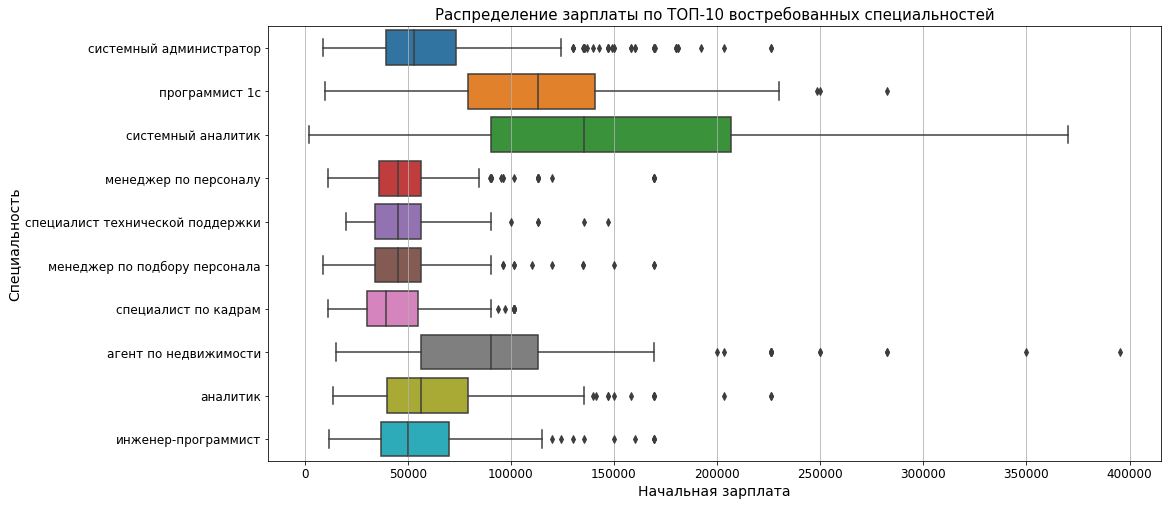

In [47]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(y='name_part1', x='salary_min', data=vacancies, order=names, ax=ax)
plt.title('Распределение зарплаты по ТОП-10 востребованных специальностей')
plt.xlabel('Начальная зарплата')
plt.ylabel('Cпециальность')
plt.grid(axis='x')
plt.show()

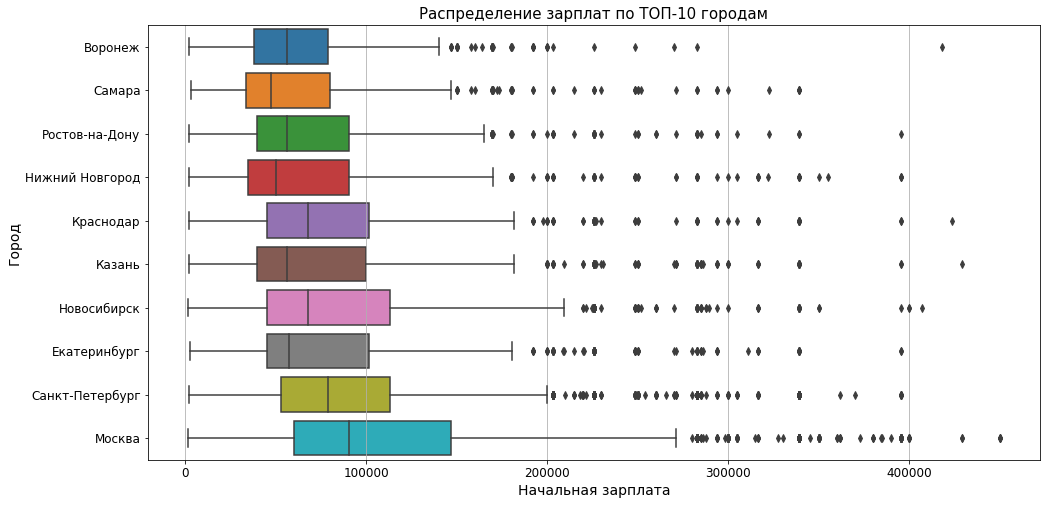

In [48]:
areas_names = dfp['area_name'].value_counts()[:10].index
areas = dfp[dfp['area_name'].isin(areas_names)]
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(y='area_name', x='salary_min', data=areas, order=areas_names[::-1], ax=ax)
plt.title('Распределение зарплат по ТОП-10 городам')
plt.xlabel('Начальная зарплата')
plt.ylabel('Город')
plt.grid(axis='x')
plt.show()

По графикам видно, что самая востребованная специальность: системный администратор имеет медианную зарплату чуть выше специалиста тех.поддержки или специалиста по кадрам. Самая высокая медианная зарплата у системного аналитика, затем следует программист 1С. Наибольший разброс в зарплатах у агента по недвижимости.
Так же видна тенденция по возрастанию зарплаты в зависимости от количества поданных вакансий, с наибольшими зарплатами в Москве и Санкт-Петербурге.
#### Посмотрим распределение зарплаты от желаемого опыта работы

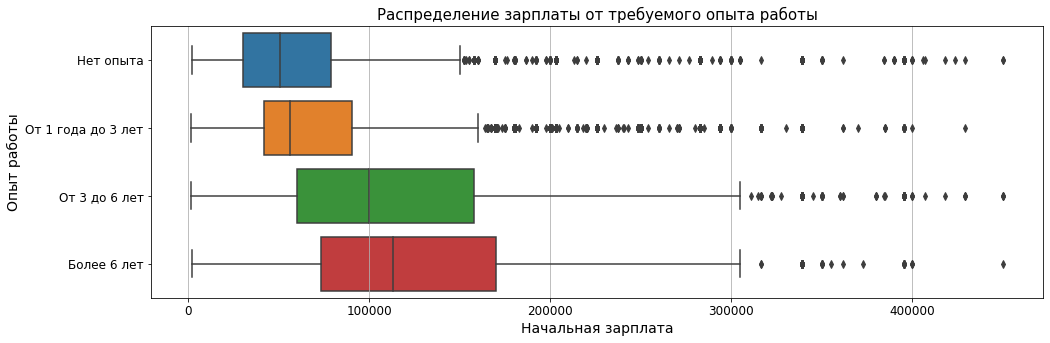

In [54]:
# заполним пропуски как 'Нет опыта'
dfp.experience_name.fillna('Нет опыта', inplace=True)
sort_names = ['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет']
fig, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(y='experience_name', x='salary_min', data=dfp, order=sort_names, ax=ax)
plt.title('Распределение зарплаты от требуемого опыта работы')
plt.xlabel('Начальная зарплата')
plt.ylabel('Опыт работы')
plt.grid(axis='x')
plt.show()

По графику видим, что медианная зарплата и весь двухквартильный размах укладывается в постулат "чем больше опыт работы - тем выше зарплата". Но выбросы показывают, что есть отдельные случаи высоких зарплат независимо от опыты работы.
### Проанализируем взаимосвязь между категориальными колонками:
#### Специальностями и требуемым опытом работы

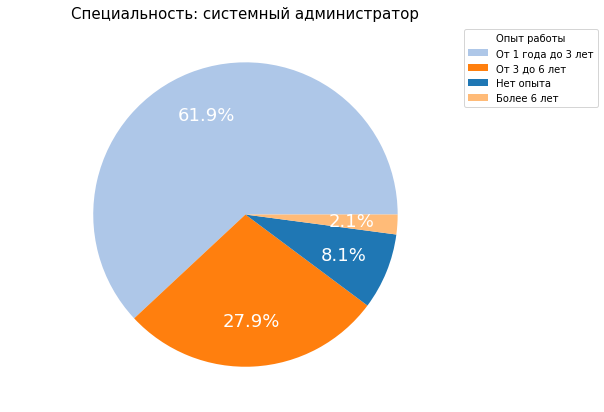

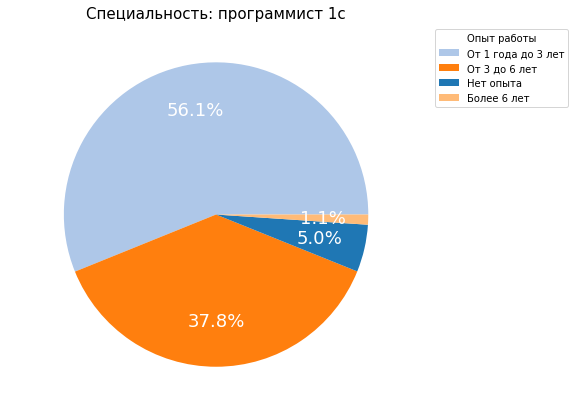

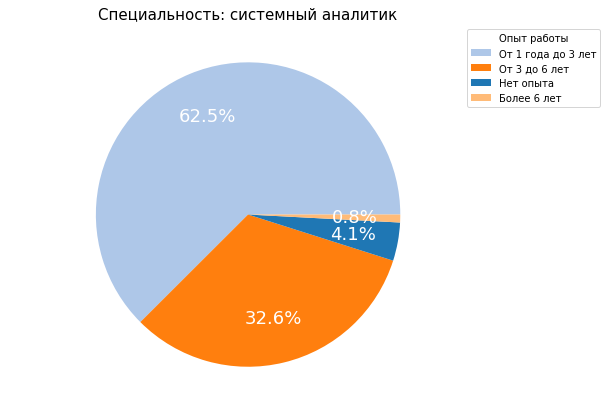

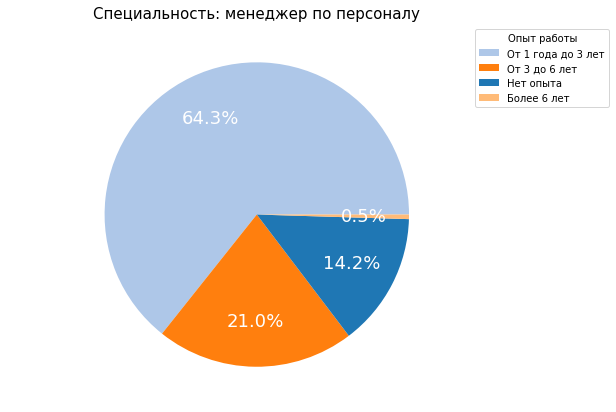

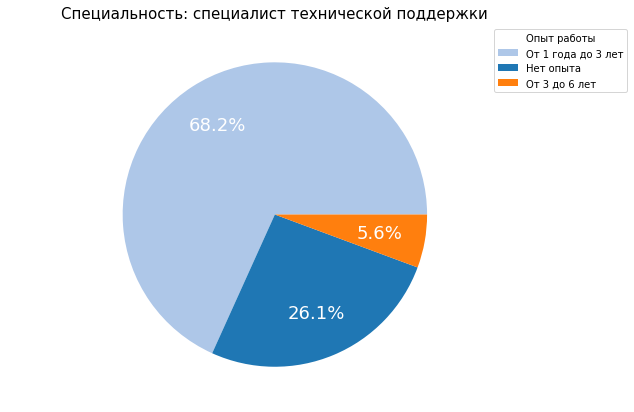

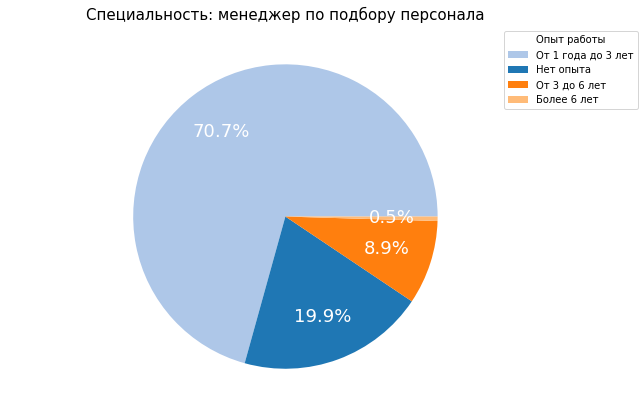

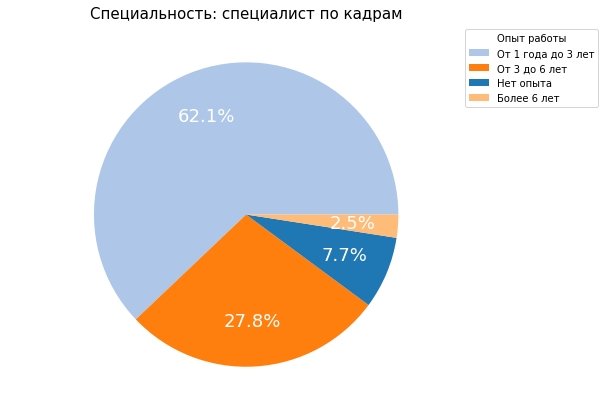

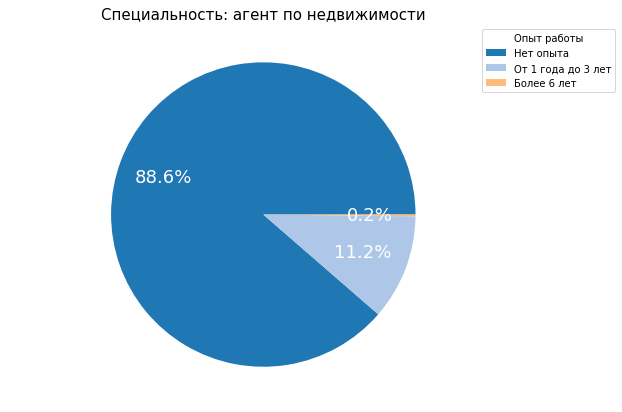

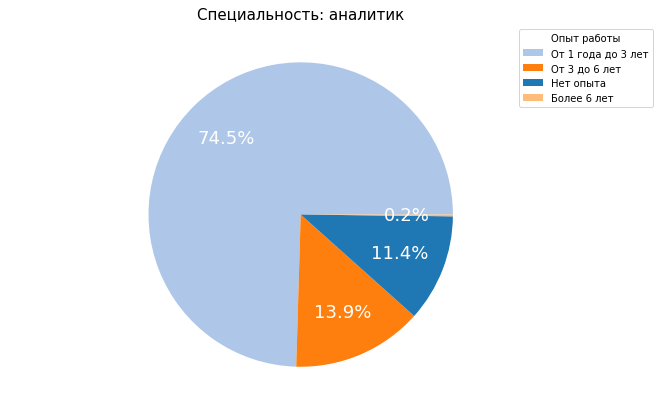

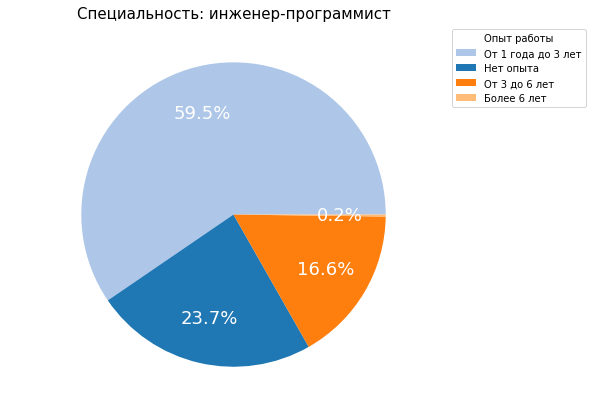

In [138]:
colors = dict(zip(sort_names, plt.cm.tab20.colors[:len(sort_names)]))

for name in names:
    ncounts = dfp[dfp['name_part1'] == name]['experience_name'].value_counts()
    labels = ncounts.index
    
    fig, ax = plt.subplots(figsize=(16, 7))
    plt.title(f'Специальность: {name}')
    patches, _, _ = plt.pie(ncounts.values,
                            labels=labels,
                            colors=[colors[key] for key in labels],
                            textprops=dict(color="w", fontsize=18),
                            autopct='%.1f%%', pctdistance = 0.7
                            )
    plt.legend(patches, labels, title="Опыт работы", loc="upper center",
               bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

По круговым диаграммам видно, что по специальностям примерно сохраняется соотношение между градациями по опыту работы, но есть исключения, например "Агент по недвижимости", где в 88% опыт не требуется.

#### Взаимосвязь между Регионами и специальностями

In [139]:
def flt_values_to_df(dts, col_name):
    return pd.DataFrame(pd.core.common.flatten(dts[col_name].dropna().tolist()), columns=[col_name])


regions = dfp['region'].value_counts()[:10].index
regions

Index(['Москва', 'Санкт-Петербург', 'Краснодарский край',
       'Свердловская область', 'Республика Татарстан', 'Новосибирская область',
       'Московская область', 'Нижегородская область', 'Ростовская область',
       'Самарская область'],
      dtype='object')

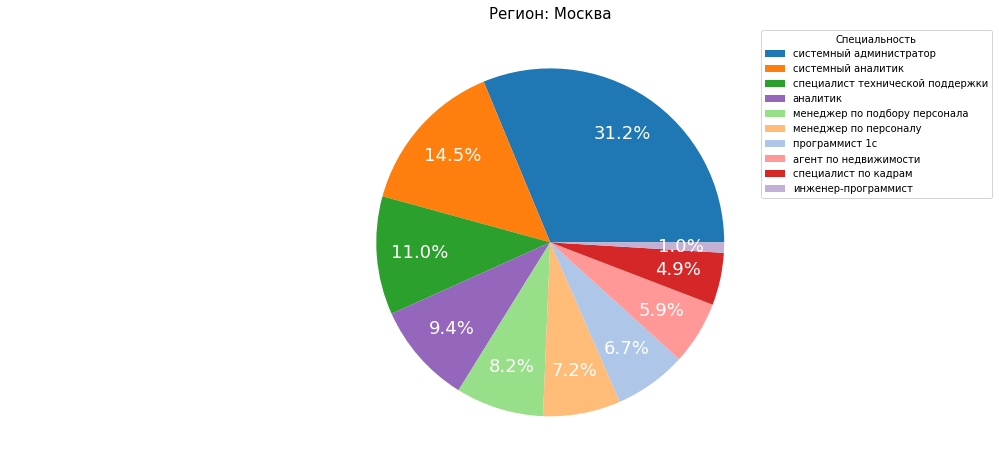

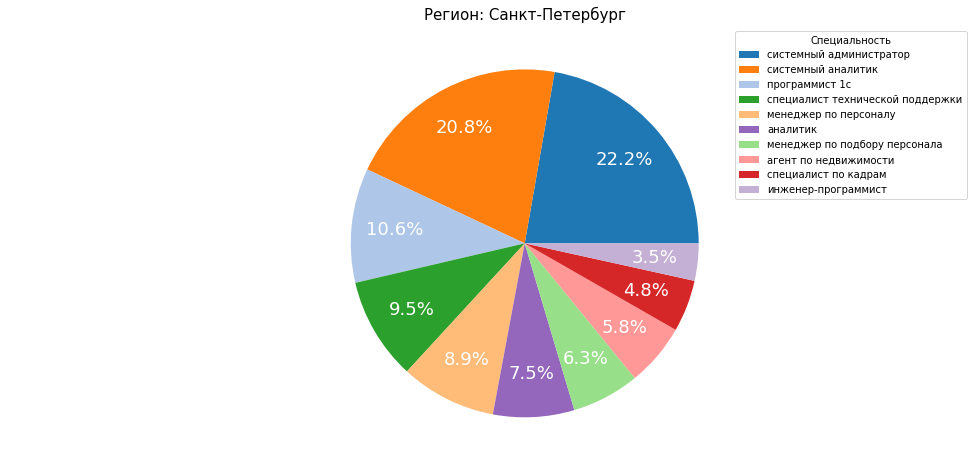

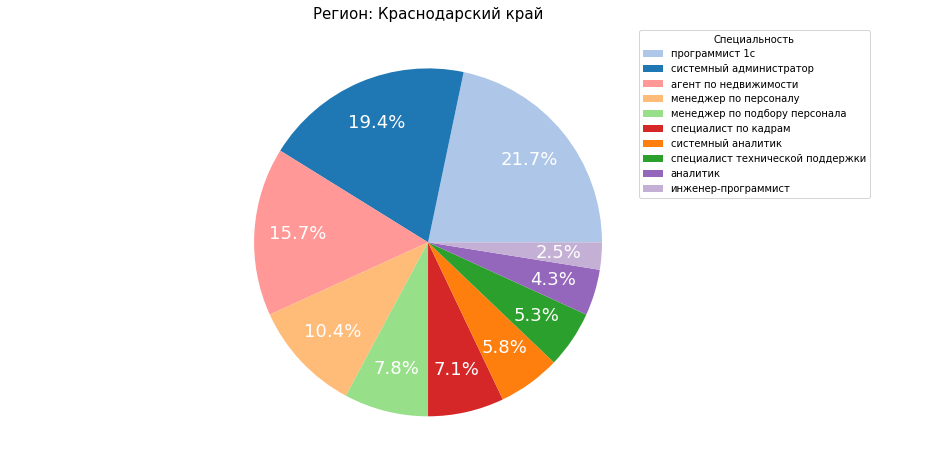

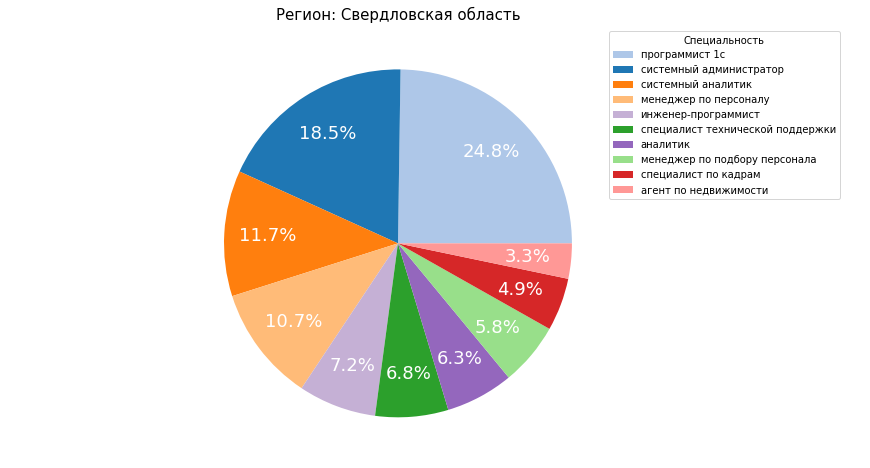

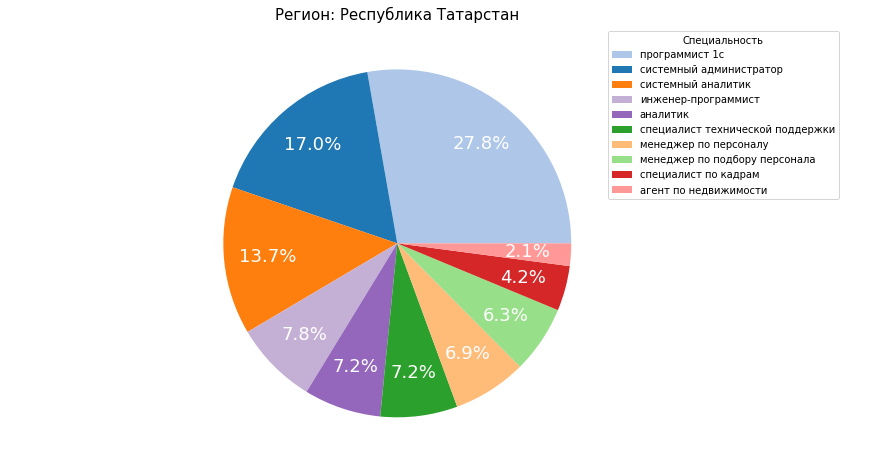

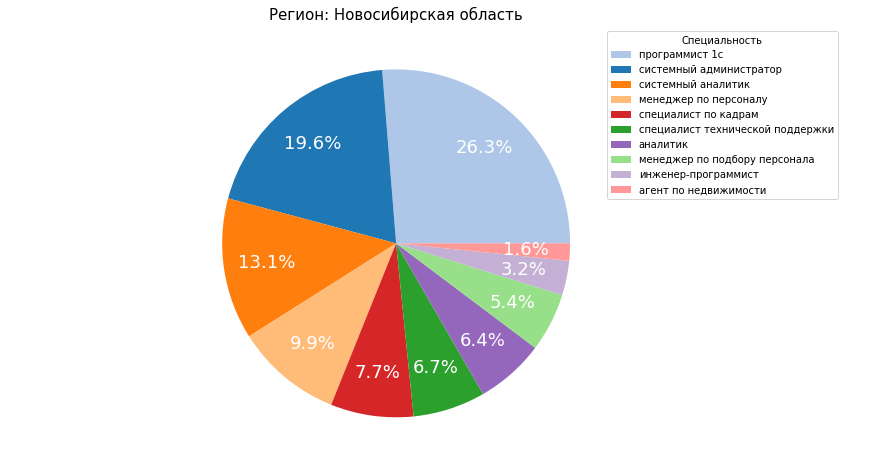

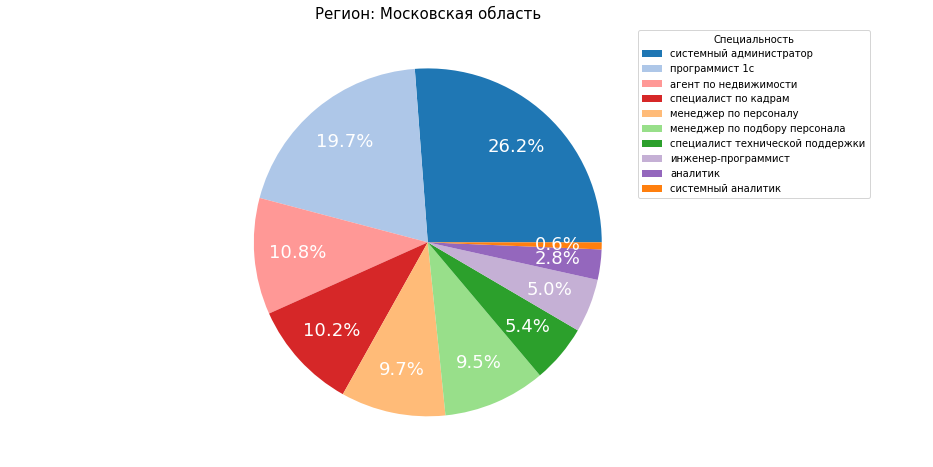

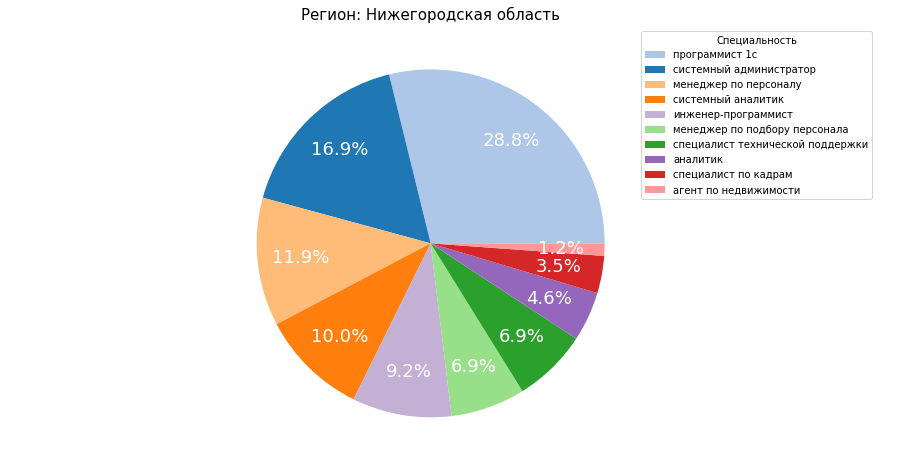

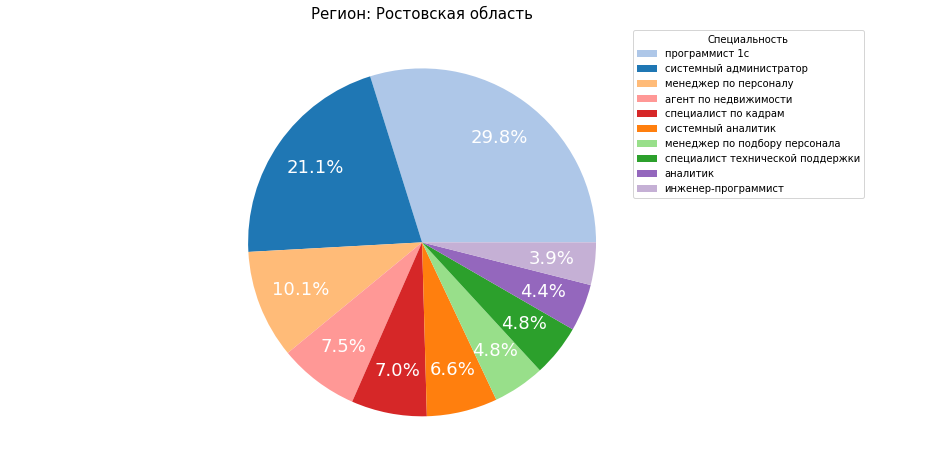

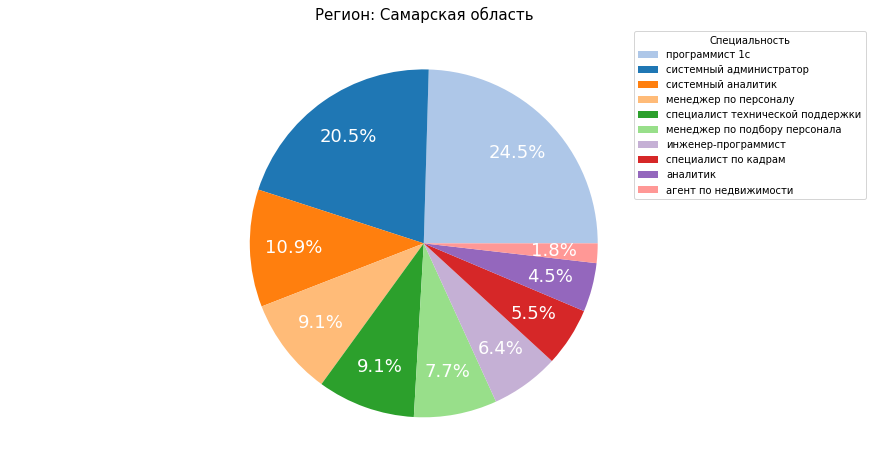

In [142]:
colors = dict(zip(names, plt.cm.tab20.colors[:len(names)]))
for region in regions:
    col_name = 'name_part1'
    df_rg = flt_values_to_df(dfp[(dfp['region'] == region) & dfp[col_name].isin(names)], col_name)
    ncounts = df_rg[col_name].value_counts()
    labels = ncounts.index
    
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.title(f'Регион: {region}')
    patches, _, _ = plt.pie(ncounts.values,
                            labels=labels,
                            colors=[colors[key] for key in labels],
                            textprops=dict(color="w", fontsize=18),
                            autopct='%.1f%%', pctdistance = 0.75
                            )
    plt.legend(patches, labels, title="Специальность", loc="upper center",
               bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

По круговым диаграммам видно, что в столицах самые востребованные специальности системный администратор и системный аналитик. В регионах самый востребованная специальность: программист 1С и после неё системный администратор и системный аналитик, причем в каждом регионе своя спецфика по востребованным специальностям

#### взаимосвязь между Специальностями и ключевыми навыками

In [123]:
names

Index(['системный администратор', 'программист 1с', 'системный аналитик',
       'менеджер по персоналу', 'специалист технической поддержки',
       'менеджер по подбору персонала', 'специалист по кадрам',
       'агент по недвижимости', 'аналитик', 'инженер-программист'],
      dtype='object')

In [148]:
skill_names = df_sk['key_skills'].value_counts()[:20].index
skill_names

Index(['работа в команде', 'sql', 'грамотная речь', 'linux', 'git',
       'английский язык', 'подбор персонала', 'ведение переговоров',
       'управление проектами', 'python', 'пользователь пк',
       'обучение и развитие', 'деловое общение', 'активные продажи',
       'javascript', 'телефонные переговоры', 'postgresql',
       'организаторские навыки', '1с программирование', 'java'],
      dtype='object')

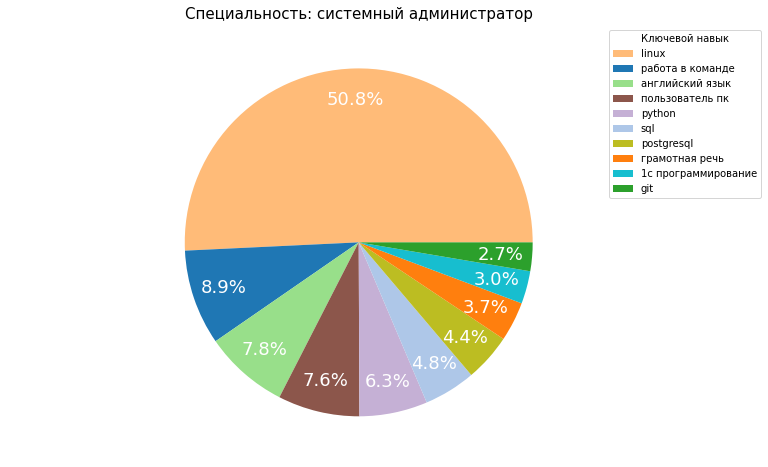

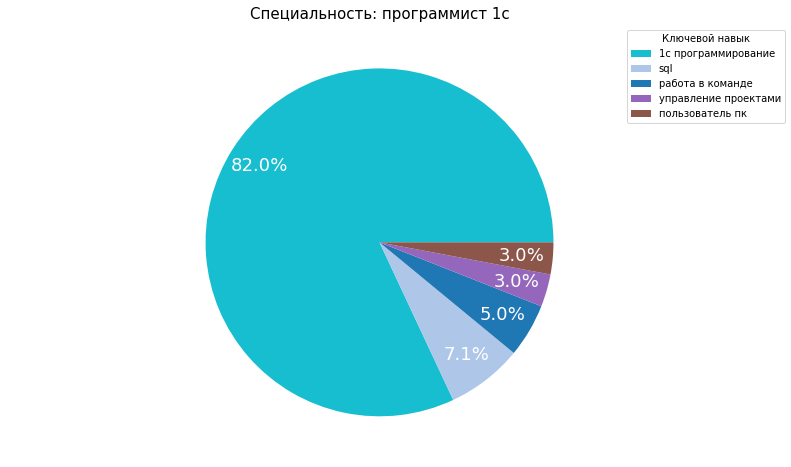

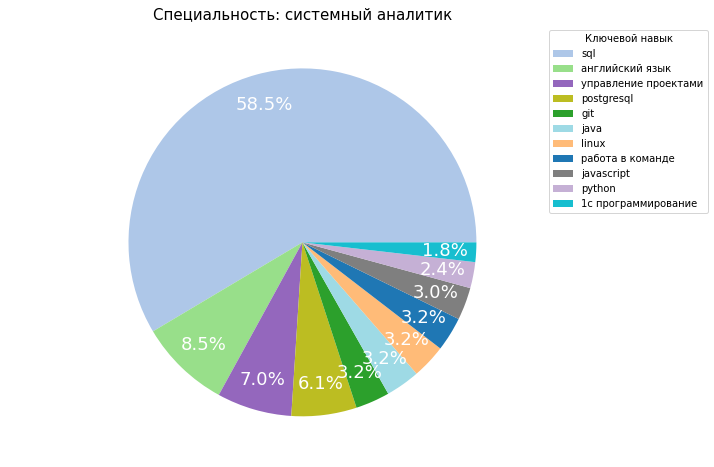

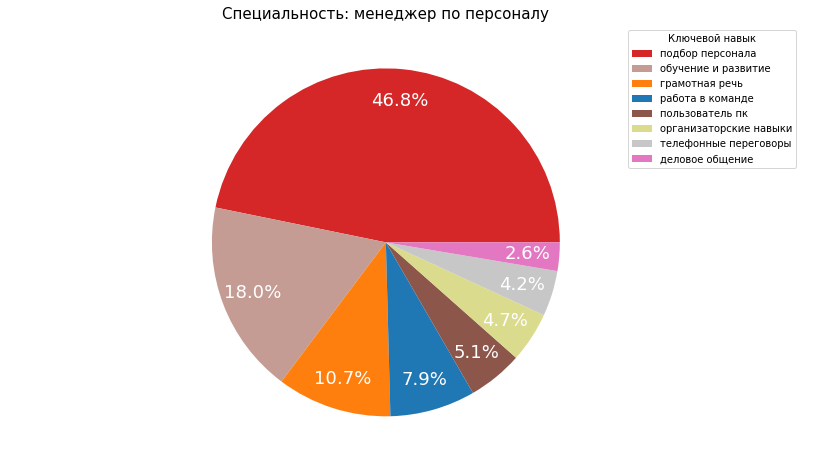

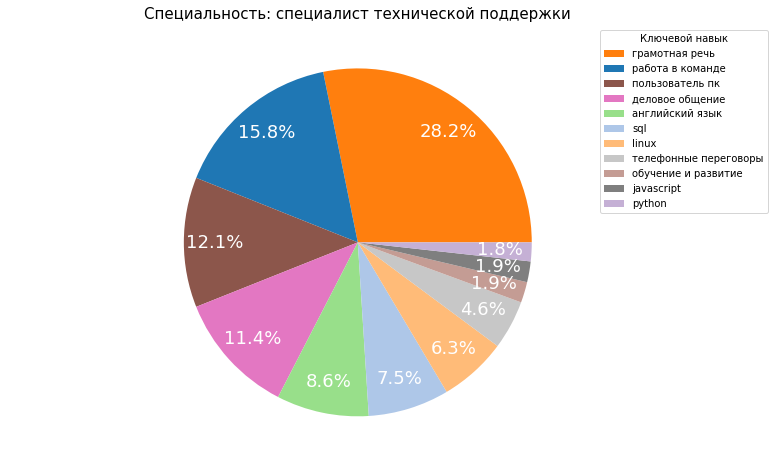

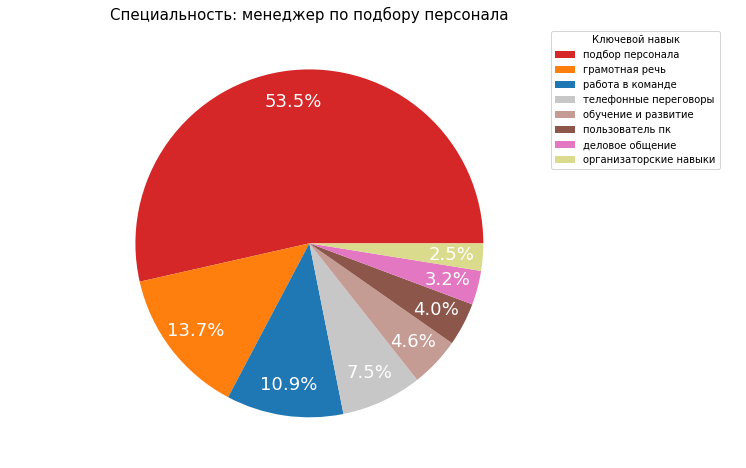

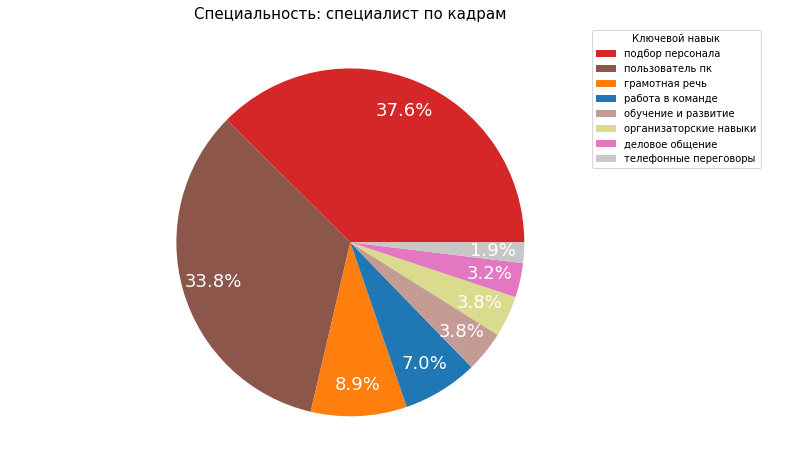

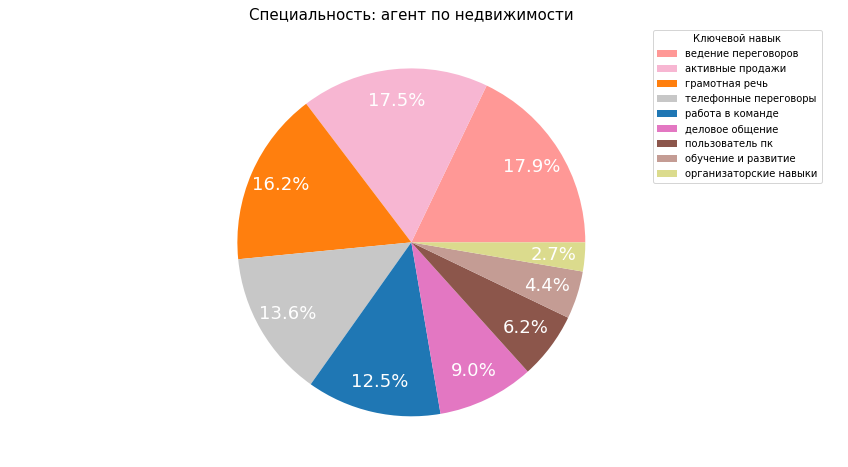

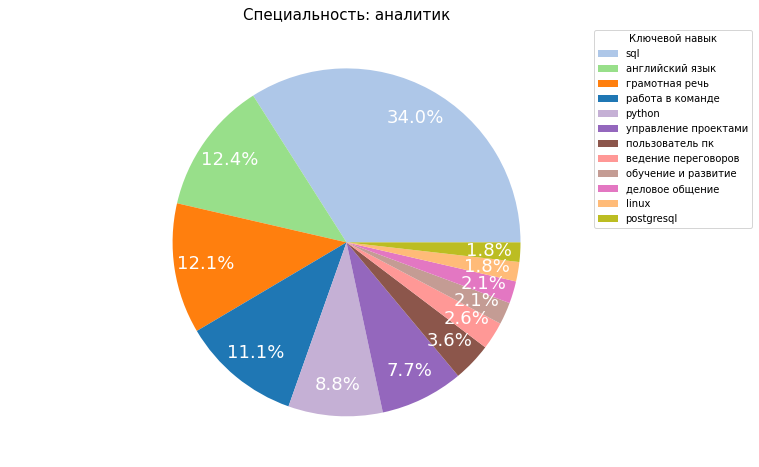

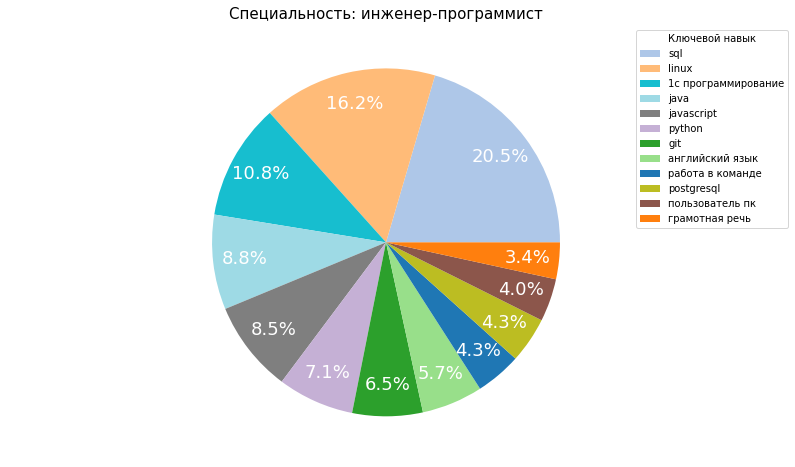

In [149]:
colors = dict(zip(skill_names, plt.cm.tab20.colors[:len(skill_names)]))
for name in names:
    col_name = 'key_skills_name'
    df_en = flt_values_to_df(dfp[dfp['name_part1'] == name], col_name)
    df_en = df_en[df_en[col_name].isin(skill_names)]
    ncounts = df_en[col_name].value_counts()
    # уберем значения менее 1.5%
    ncounts = ncounts[ncounts.values > ncounts.sum()/100*1.5]
    labels = ncounts.index
    
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.title(f'Специальность: {name}')
    patches, _, _ = plt.pie(ncounts.values,
                            labels=labels,
                            colors=[colors[key] for key in labels],
                            textprops=dict(color="w", fontsize=18),
                            autopct='%.1f%%', pctdistance = 0.82
                            )
    plt.legend(patches, labels, title="Ключевой навык", loc="upper center",
               bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

По круговым диаграммам видно, что для каждой специальности свой набор основных ключевых навыков.